In [1]:
%load_ext autoreload
%autoreload 2

# read data

In [6]:
import numpy as np
from nr_iccub.nr_post import gw_math
import matplotlib.pyplot as plt

from nr_iccub.sim.NRsim_from_ICCUB import NRsim_from_ICCUB

In [7]:
root_dir = 'sample_data'

In [8]:
id = '0001'
path = f'{root_dir}/ICCUB-{id}/'

In [9]:
nrsim = NRsim_from_ICCUB(path)
nrsim_extrap = NRsim_from_ICCUB(path, rd = 'extrap')

Using value of f0 in metadata, f0 = 0.0026
Using value of f0 in metadata, f0 = 0.0026


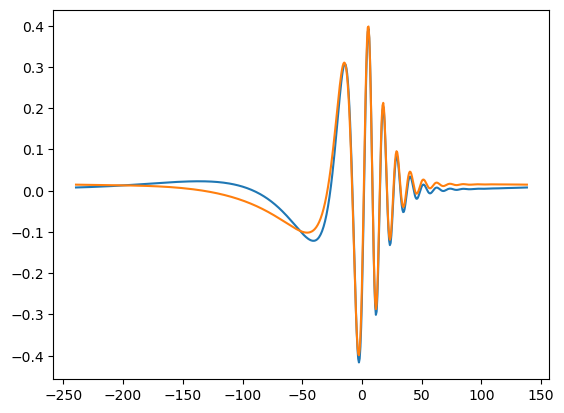

In [10]:
h = nrsim.get_mode((2,2), tp = 'h')
h_extrap = nrsim_extrap.get_mode((2,2), tp = 'h')
plt.plot(h.time, h.value.real)
plt.plot(h_extrap.time, h_extrap.value.real)

In [11]:
psi4 = nrsim.get_mode((2,2), tp = 'psi4')
psi4_extrap = nrsim_extrap.get_mode((2,2), tp = 'psi4')

In [12]:
my_psi4_extrap = gw_math.extrap_psi4(psi4, 
                    f0 = nrsim.adm_param['f0'], 
                    r = nrsim.radius_to_compute, 
                    lm = (2, 2))

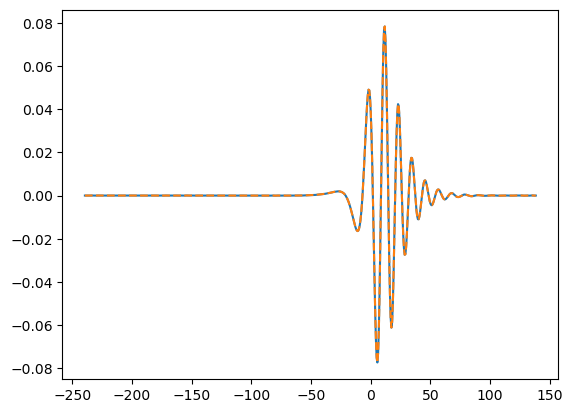

In [13]:
plt.plot(psi4_extrap.time, psi4_extrap.value.real)
plt.plot(my_psi4_extrap.time, my_psi4_extrap.value.real, '--')

In [14]:
np.abs(psi4_extrap.value - my_psi4_extrap.value).max()

7.152448122690996e-18